In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
link= r'E:\My_Plan\DataAnalyst\Project\DA_Spatial'.replace('\\','/')
namefile= r'/zomato.csv'
df=pd.read_csv(link+namefile)
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [3]:
na_col=[col for col in df.columns if df[col].isna().sum()>0]

In [4]:
for i in na_col:
    print(f'Percentage of N/a data following {i.upper()} column is {round(df[i].isna().sum()/len(df[i])*100,2)}%')

Percentage of N/a data following RATE column is 15.03%
Percentage of N/a data following PHONE column is 2.34%
Percentage of N/a data following LOCATION column is 0.04%
Percentage of N/a data following REST_TYPE column is 0.44%
Percentage of N/a data following DISH_LIKED column is 54.29%
Percentage of N/a data following CUISINES column is 0.09%
Percentage of N/a data following APPROX_COST(FOR TWO PEOPLE) column is 0.67%


In [5]:
df=df.dropna(axis='index',subset=['rate'])

In [6]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [7]:
def split(x):
    return x.split('/')[0]

In [8]:
df['rate']=df['rate'].apply(split)

In [9]:
df['rate']=pd.to_numeric(df['rate'],errors='coerce').fillna(0)

In [10]:
df['rate']=df['rate'].astype(float)

In [11]:
mean_rate_by_name=df.groupby('name')['rate'].mean().to_frame().reset_index()
mean_rate_by_name.columns=['Restaurants','Average_Rating']
mean_rate_by_name.head(10)

Restaurants  Average_Rating
0                          #FeelTheROLL           3.400
1                            #L-81 Cafe           3.900
2                               #refuel           3.700
3                              1000 B.C           3.200
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C           3.700
5            11 to 11 Express Biriyanis           3.500
6                    1131 Bar + Kitchen           4.500
7             12th Main - Grand Mercure           4.100
8                         1441 Pizzeria           4.100
9                        1522 - The Pub           4.212

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average_Rating', ylabel='Density'>

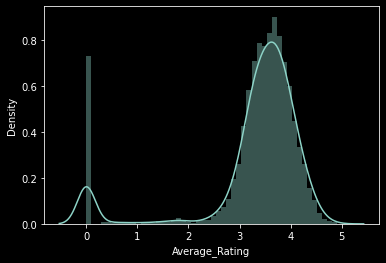

In [12]:
sns.distplot(mean_rate_by_name['Average_Rating'])

Text(0.5, 1.0, 'TOP 20 FAMOUS REST CHAINS')

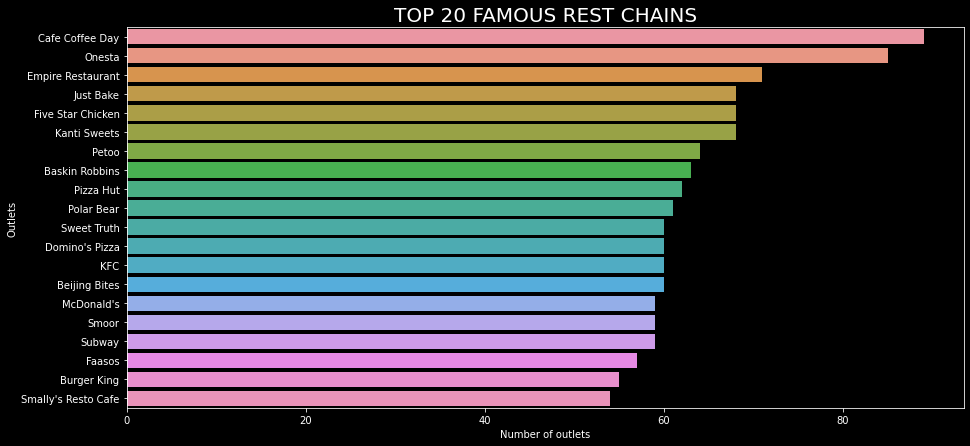

In [13]:
chains=df['name'].value_counts()[0:20]
plt.figure(figsize=(15,7))
sns.barplot(x=chains,y=chains.index)
plt.xlabel('Number of outlets',size=10)
plt.ylabel('Outlets',size=10)
plt.title('TOP 20 FAMOUS REST CHAINS',size=20)

In [14]:
online_status=df.groupby('online_order')['name'].count()
online_status

online_order
No     15634
Yes    28308
Name: name, dtype: int64

Text(0.5, 1.0, 'PERCENTAGE OF ONLINE ORDERS')

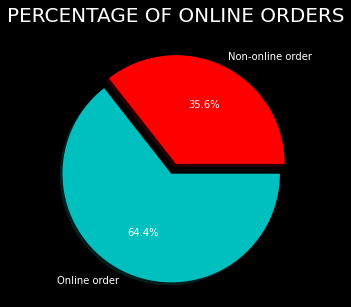

In [15]:
plt.figure(figsize=(5,5))
plt.pie(df.groupby('online_order')['name'].count(),labels=['Non-online order','Online order'],autopct='%.1f%%',explode=(0,0.1),shadow=True,colors=['r','c'])
# plt.legend()
plt.title('PERCENTAGE OF ONLINE ORDERS',size=20)

In [16]:
df01=df.groupby('location')['name'].count().to_frame()
df01=df01.sort_values(by='name',ascending=False)[0:20]
df01=df01.reset_index()
df01.head()

location  name
0                    BTM  4261
1  Koramangala 5th Block  2381
2                    HSR  2128
3            Indiranagar  1936
4               JP Nagar  1849

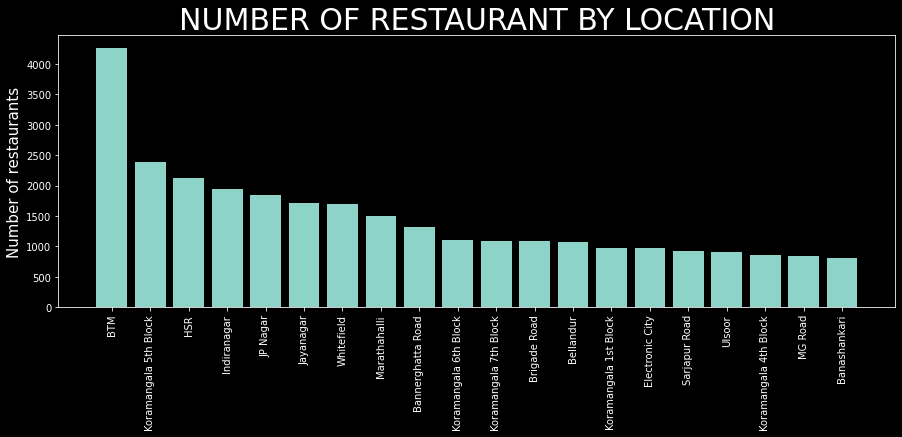

In [17]:
plt.figure(figsize=(15,5))
plt.bar(x=df01['location'],height=df01['name'])
plt.ylabel('Number of restaurants',size=15)
plt.xticks(rotation=90,size=10)
plt.title('NUMBER OF RESTAURANT BY LOCATION',size=30)
plt.show()

In [19]:
appnum=list(df[df['approx_cost(for two people)'].notna()]['approx_cost(for two people)'])

In [20]:
mean_appnum=round(np.mean([float(i.replace(',','')) for i in appnum]),1)

In [21]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].fillna(str(mean_appnum)).apply(lambda x:x.replace(',','')).astype('float')

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

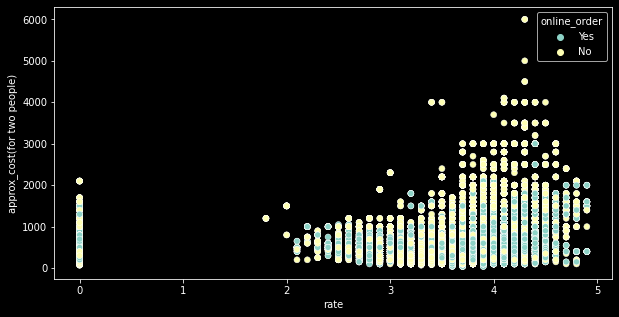

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='rate',y='approx_cost(for two people)',hue='online_order')

In [23]:
from geopy.geocoders import Nominatim

In [24]:
df_location=pd.DataFrame({'Name':df['location'].unique(),'Num':df['location'].value_counts()})
gelocator=Nominatim(user_agent='app')

In [45]:
def generate_location(location):
    Lat=[]
    Long=[]
    for name in location:
        location=gelocator.geocode(name)
        if location is None:
            Lat.append(np.nan)
            Long.append(np.nan)
        else:
            Long.append(location.longitude)
            Lat.append(location.latitude)
    return Lat,Long
    

In [47]:
Lat,Long=generate_location(df_location['Name'])

In [50]:
df_location['Lat']=Lat
df_location['Long']=Long
df_location.reset_index().drop(columns='Name').rename(columns={'index':'Name'})
df_location.dropna(subset=['Lat','Long'],inplace=True)

In [51]:
from folium.plugins import HeatMap
import folium

In [52]:
def generatebasemap(default_location=[12.9,77.6],default_zoom=10):
    basemap=folium.Map(location=default_location,zoom_start=default_zoom)
    return basemap
basemap=generatebasemap()

In [53]:
HeatMap(df_location[['Lat','Long','Num']].values.tolist(),zoom=10,radius=20).add_to(basemap)
basemap

In [54]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [57]:
df_bytype=df.groupby(['listed_in(city)','listed_in(type)'])['url'].count().reset_index()
Loc_name=list(df_bytype['listed_in(city)'].unique())

In [61]:
Lat01,Long01=generate_location(Loc_name)

In [97]:
df_bytype_loc=pd.DataFrame({'loc_name':Loc_name,'Lat':Lat01,'Long':Long01})

In [98]:
df_bytype=pd.merge(df_bytype,df_bytype_loc,left_on='listed_in(city)',right_on='loc_name')

In [99]:
df_bytype

listed_in(city)     listed_in(type)   url    loc_name        Lat  \
0               BTM              Buffet    39         BTM  45.954851   
1               BTM               Cafes    93         BTM  45.954851   
2               BTM            Delivery  1516         BTM  45.954851   
3               BTM            Desserts   152         BTM  45.954851   
4               BTM            Dine-out   887         BTM  45.954851   
..              ...                 ...   ...         ...        ...   
190      Whitefield            Delivery   593  Whitefield  44.373058   
191      Whitefield            Desserts    80  Whitefield  44.373058   
192      Whitefield            Dine-out   487  Whitefield  44.373058   
193      Whitefield  Drinks & nightlife    35  Whitefield  44.373058   
194      Whitefield       Pubs and bars    32  Whitefield  44.373058   

           Long  
0   -112.496595  
1   -112.496595  
2   -112.496595  
3   -112.496595  
4   -112.496595  
..          ...  
190  -71.611858  
191  -71.611858  
192  -71.611858  
193  -71.611858  
194  -71.611858  

[195 rows x 6 columns]

In [124]:
basemap01=generatebasemap()

In [125]:
location_pro=df_bytype[['Lat','Long']].drop_duplicates().values.tolist()

[[45.95485055, -112.49659530324134],
 [15.8876779, 75.7046777],
 [12.8870547, 77.5969483],
 [12.9417261, 77.5755021],
 [12.93577245, 77.66676103753434],
 [40.28745, -76.964526],
 [33.5935063, -79.0345627],
 [40.7142453, -74.0084984],
 [-8.6368007, 115.2147012],
 [12.996845, 77.6130165],
 [18.1475, 41.538889],
 [12.9732913, 77.6404672],
 [12.2655944, 76.6465404],
 [27.64392675, 83.05280519687284],
 [13.0221416, 77.6403368],
 [13.0093455, 77.6377094],
 [12.93433385, 77.63040639553275],
 [12.9343774, 77.628415],
 [12.9400321, 77.6203272],
 [12.9302645, 77.6332585],
 [40.7652844, -76.373824],
 [29.4534927, -98.6440138],
 [13.0027353, 77.5703253],
 [12.9552572, 77.6984163],
 [13.0343483, 77.5683468],
 [41.528338, -71.286422],
 [12.9882338, 77.554883],
 [5.4173857, 100.3099591],
 [12.9242381, 77.6289059],
 [44.3730577, -71.6118577]]

In [127]:
for i in location_pro:
    folium.Marker(location=i).add_to(basemap01)
basemap01